# Выбор локации для скважины

## Описание проекта

Добывающей компании нужно решить, где бурить новую скважину.

В наличии пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.

Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.
Также нужно проанализировать возможную прибыль и риски техникой *Bootstrap.*

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
try:
    df0 = pd.read_csv('/datasets/geo_data_0.csv')
    df1 = pd.read_csv('/datasets/geo_data_1.csv')
    df2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    df1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    df2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [ ]:
dfs = [df0, df1, df2]

Выводим общую информацию о данных.

In [ ]:
for i, df in enumerate(dfs):
    print('{:=^50}'.format(f' Регион {i} '))
    df.info()
    display(df.head())
    print('Дубликаты:', df.duplicated().sum(), end='\n\n')

==================== Регион 0 ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Дубликаты: 0

==================== Регион 1 ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Дубликаты: 0

==================== Регион 2 ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Дубликаты: 0



Пропуски и явные дубликаты в данных отсутствуют.

Отделяем признаки и целевой признак.

In [ ]:
data = [(df.drop(['id', 'product'], axis=1), df['product']) for df in dfs]

Проверка корреляции признаков.

In [ ]:
for df in dfs:
    display(df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm', vmin=-1))

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Немного коррелируют признаки `f0` и `f1` в 0-м регионе, но не критично.

## Обучение и проверка модели

In [ ]:
seed = 277353

In [ ]:
model_results = []
for i, (x, y) in enumerate(data):
    print('{:=^26}'.format(f' Регион {i} '))

    x_train, x_valid, y_train, y_valid = train_test_split(x,
                                                          y,
                                                          test_size=0.25,
                                                          random_state=seed)
    assert (x_train.shape[0] == y_train.shape[0] == 75000 and
           x_valid.shape[0] == y_valid.shape[0] == 25000), "Неправильные размеры выборок!"

    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_valid = scaler.transform(x_valid)

    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_valid)

    model_results.append((y_valid, pred))
    print('Mean:', pred.mean())
    print('RMSE:', mean_squared_error(y_valid, pred) ** 0.5)

======== Регион 0 ========
Mean: 92.38473135408651
RMSE: 37.60350418158968
======== Регион 1 ========
Mean: 68.7130405804522
RMSE: 0.8940293940385126
======== Регион 2 ========
Mean: 94.9446281888117
RMSE: 40.23337037486705


В регионе 1, модель очень точно предсказывает объём сырья, в отличии от регионов 0 и 2, где ошибка достаточно высокая.

## Подготовка к расчёту прибыли

In [ ]:
POINTS = 500
SAMPLE = 200
BUDGET = 10e9
PRICE = 450e3

Минимальный объём сырья для безубыточной разработки скважины:

In [ ]:
min_product = BUDGET/SAMPLE/PRICE
print(f'{min_product:.3f}')

111.111


In [ ]:
for i, df in enumerate(dfs):
    m = df['product'].mean()
    print(f'Средний объём сырья в регионе {i}: {m:.3f}')

Средний объём сырья в регионе 0: 92.500
Средний объём сырья в регионе 1: 68.825
Средний объём сырья в регионе 2: 95.000


Средний объём сырья по регионам значительно меньше необходимого, поэтому есть риск убытков.

In [ ]:
def income(valid, pred):
    i = np.argpartition(pred, -SAMPLE)[-SAMPLE:]
    product = np.array(valid)[i].sum()
    return product * PRICE - BUDGET

Предварительно проверяем максимально возможную прибыль в каждом регионе

In [ ]:
for i in range(3):
    profit = income(*model_results[i])
    print(f"Прибыль по топ 200 скважинам {i} региона: {profit / 10**9:.2f} млрд руб")

Прибыль по топ 200 скважинам 0 региона: 2.89 млрд руб
Прибыль по топ 200 скважинам 1 региона: 2.42 млрд руб
Прибыль по топ 200 скважинам 2 региона: 2.69 млрд руб


Максимально возможная прибыль больше нуля, несмотря на то что в среднем каждый регион убыточный. Значит есть смысл расчитать риски и возможную прибыль.

## Расчёт прибыли и рисков

====== Регион 0 ======
Mean  :  389371847.06
Lower : -101830811.62
Upper :  873506094.16
Risk  : 6.4%


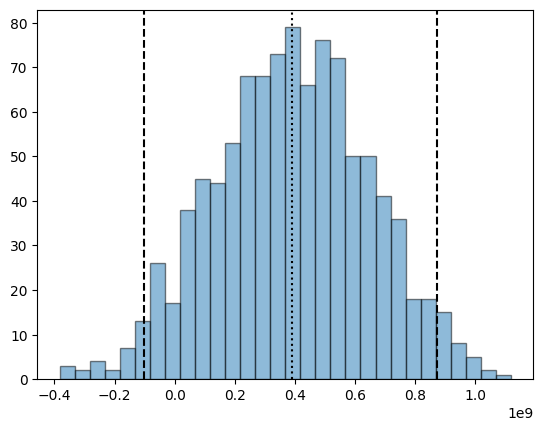

====== Регион 1 ======
Mean  :  449389350.44
Lower :   64579881.89
Upper :  852992311.98
Risk  : 1.2%


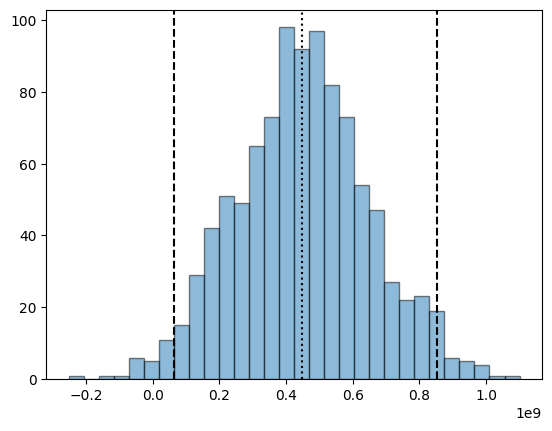

====== Регион 2 ======
Mean  :  351840657.90
Lower : -137099541.78
Upper :  895042207.51
Risk  : 9.1%


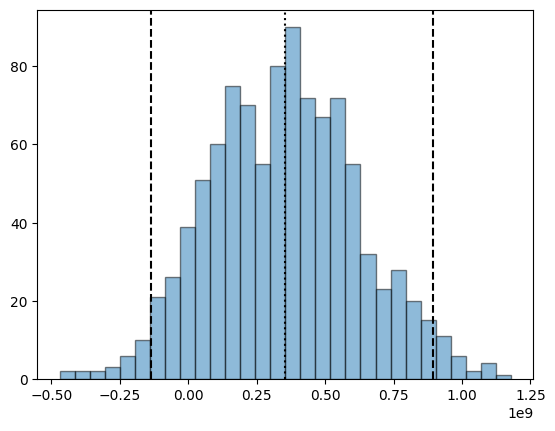

In [ ]:
state = np.random.RandomState(seed)
for i, (valid, pred) in enumerate(model_results):
    values = []
    valid = valid.reset_index(drop=True)
    for _ in range(1000):
        v = valid.sample(POINTS, replace=True, random_state=state)
        p = pred[v.index]
        values.append(income(v, p))
    values = pd.Series(values)

    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    print('{:=^22}'.format(f' Регион {i} '))
    print(f'Mean  : {mean:>13.2f}')
    print(f'Lower : {lower:>13.2f}')
    print(f'Upper : {upper:>13.2f}')
    print(f'Risk  : {(values < 0).mean()*100}%')
    plt.hist(values, bins=30, ec='black', alpha=0.5)
    plt.axvline(mean, c='black', ls=':')
    plt.axvline(lower, c='black', ls='--')
    plt.axvline(upper, c='black', ls='--')
    plt.show()

Вывод: Лучше всего для разработки подойдёт регион №1 так, как средняя прибыль здесь самая высокая, а также низкая вероятность убытков, в то время как в остальных регионах она достаточно высокая.